Question 1 - Extracting Tesla Stock Data Using yfinance 

In [1]:
import yfinance as yf

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")

# Get historical market data
tesla_history = tesla.history(period="max")

print(tesla_history.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [2]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage containing Tesla revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

response = requests.get(url)

#  the request 
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing the revenue data
    revenue_table = soup.find('table', class_='historical_data_table')
    
    # Extract the rows of the table
    rows = revenue_table.find_all('tr')
    
    # Iterate over the rows and extract the revenue data
    for row in rows:
        # Extract cells from the row
        cells = row.find_all('td')
        if len(cells) > 0:
            # Extract relevant information (e.g., date and revenue)
            date = cells[0].text
            revenue = cells[1].text
            
            # Print or store the extracted data
            print(date, revenue)
else:
    print('Failed to retrieve data. Status code:', response.status_code)


Failed to retrieve data. Status code: 403


Question 3 - Extracting GameStop Stock Data Using yfinance 

In [3]:
import yfinance as yf

# Fetch GameStop stock data
gamestop = yf.Ticker("GME")

# Get historical market data
gamestop_history = gamestop.history(period="max")

print(gamestop_history.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [4]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the table containing the revenue data
    revenue_table = soup.find('table', class_='historical_data_table')
    
    # Extract the rows of the table
    rows = revenue_table.find_all('tr')
    
    # Iterate over the rows and extract the revenue data
    for row in rows:
        # Extract cells from the row
        cells = row.find_all('td')
        if len(cells) > 0:
            # Extract relevant information (e.g., date and revenue)
            date = cells[0].text
            revenue = cells[1].text
            
            # Print or store the extracted data
            print(date, revenue)
else:
    print('Failed to retrieve data. Status code:', response.status_code)


Failed to retrieve data. Status code: 403


Question 5 - Tesla Stock and Revenue Dashboard

Failed to retrieve revenue data. Status code: 403


TypeError: 'NoneType' object is not subscriptable

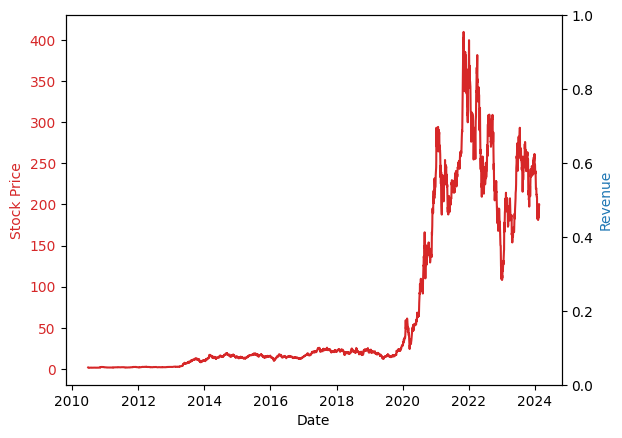

In [5]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch Tesla stock data
def fetch_stock_data():
    tesla = yf.Ticker("TSLA")
    tesla_data = tesla.history(period="max")
    return tesla_data

# Function to fetch Tesla revenue data
def fetch_revenue_data():
    url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        revenue_table = soup.find('table', class_='historical_data_table')
        rows = revenue_table.find_all('tr')
        data = []
        for row in rows[1:]:  # Skipping header row
            cells = row.find_all('td')
            date = cells[0].text
            revenue = cells[1].text
            data.append({'Date': date, 'Revenue': revenue})
        revenue_df = pd.DataFrame(data)
        return revenue_df
    else:
        print('Failed to retrieve revenue data. Status code:', response.status_code)

# Fetching data
stock_data = fetch_stock_data()
revenue_data = fetch_revenue_data()

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Revenue', color=color)
ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tesla Stock Price and Revenue')
plt.show()



Question 6 - GameStop Stock and Revenue Dashboard

Failed to retrieve revenue data. Status code: 403


TypeError: 'NoneType' object is not subscriptable

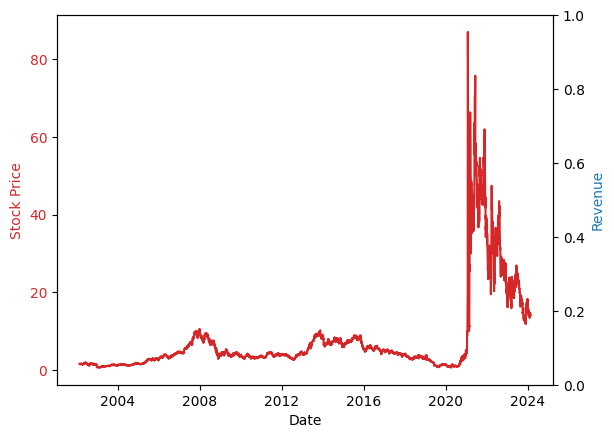

In [6]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch GameStop stock data
def fetch_stock_data():
    gamestop = yf.Ticker("GME")
    gamestop_data = gamestop.history(period="max")
    return gamestop_data

# Function to fetch GameStop revenue data
def fetch_revenue_data():
    url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        revenue_table = soup.find('table', class_='historical_data_table')
        rows = revenue_table.find_all('tr')
        data = []
        for row in rows[1:]:  # Skipping header row
            cells = row.find_all('td')
            date = cells[0].text
            revenue = cells[1].text
            data.append({'Date': date, 'Revenue': revenue})
        revenue_df = pd.DataFrame(data)
        return revenue_df
    else:
        print('Failed to retrieve revenue data. Status code:', response.status_code)

# Fetching data
stock_data = fetch_stock_data()
revenue_data = fetch_revenue_data()

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(stock_data.index, stock_data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Revenue', color=color)
ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('GameStop Stock Price and Revenue')
plt.show()


Question 7 - Sharing your Assignment Notebook